In [148]:
import suite2p
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
from natsort import natsorted
from multiprocessing import Pool
from joblib import Parallel, delayed
from pathlib import Path
import matplotlib.pyplot as plt
#from suite2p.detection.chan2detect import cellpose_overlap
import suite2p.detection as detection
import gc
gc.collect()
import importlib
import sys
from pathlib import Path
from cellpose.models import CellposeModel, Cellpose
from cellpose.utils import fill_holes_and_remove_small_masks
#from cellpose.transforms import normalize99
# Add the directory containing your script to the Python path
#sys.path.append(r'C:\Users\User\Project-SLMonlineControl\PYsubfun')
sys.path.append(r'C:\Users\zhangl33\Projects\Project-SLMonlineControl\CodeAndPackages\PYsubfun')
from skimage.morphology import white_tophat, disk



# Now you can import your script as a module
import FastBin_Suite2p as FBS
import CalBin2p as CB
import cellpose

In [2]:
nplanes=3
SaveFolder=r'E:\LuSLMOnlineTest\SL0855-Emx1G6CII-AAV9CAMKII\02262025\suite2p'
CombinePath=os.path.join(SaveFolder, 'combined');
iscellCombined = np.load(os.path.join(CombinePath, "iscell.npy"))
statCombined = np.load(os.path.join(CombinePath, "stat.npy"),allow_pickle=True)
opsCombined = np.load(os.path.join(CombinePath, "ops.npy"),allow_pickle=True)

UnitPlane=[]
for index, Unit in enumerate(statCombined):
    UnitPlane.append(Unit['iplane'])
UnitPlane=np.array(UnitPlane)

statPlane=[None]*nplanes
opsPlane=[None]*nplanes
for plane_idx in range(nplanes):
    fpath=os.path.join(SaveFolder, f'plane{plane_idx}/');
    iscell=iscellCombined[UnitPlane==plane_idx,:]
    opsPlane[plane_idx]= np.load(os.path.join(fpath, "ops.npy"),allow_pickle=True)
    ##asign information of stat for each plane to the combined planes
    statPlane[plane_idx] = np.load(os.path.join(fpath, "stat.npy"),allow_pickle=True)

In [35]:
print(RefImg1.shape)  # Should output (nPlanes, height, width)


(3, 512, 512)


In [40]:
print(RefImg1.shape)
print(RefImg2.shape)

(3, 512, 512)
(3, 512, 512)


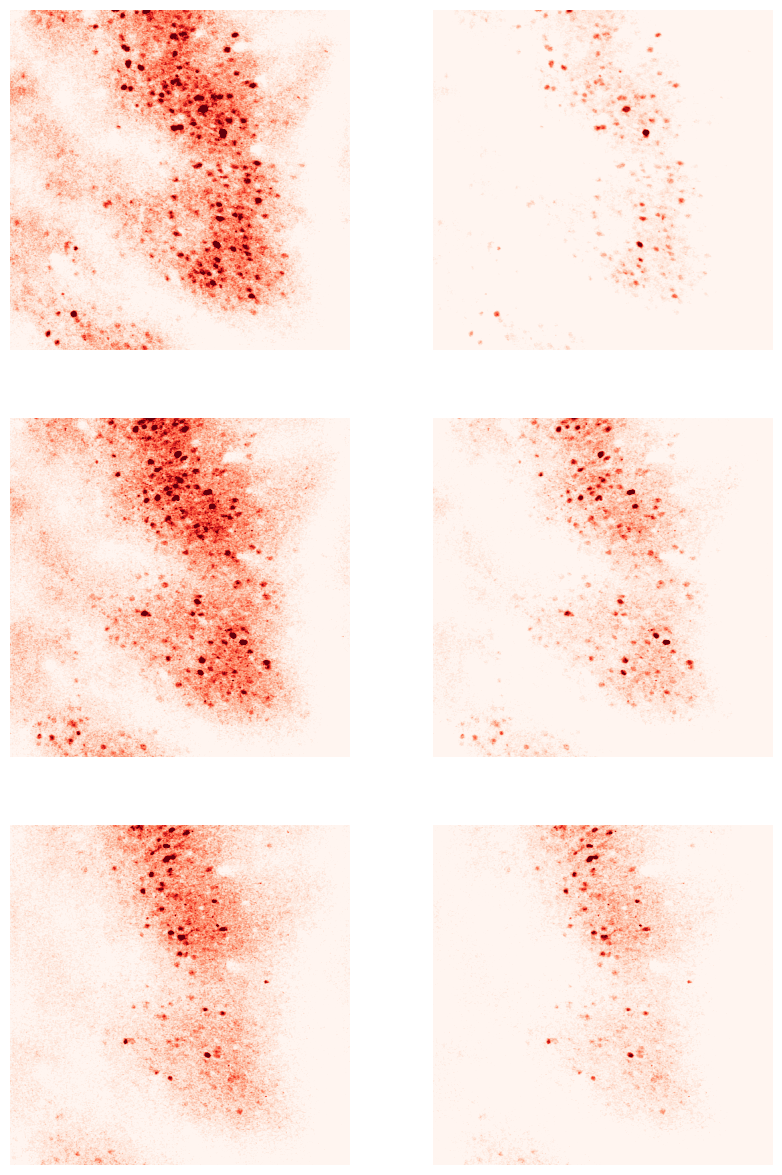

In [45]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))
Suite2pImg2 = np.zeros_like(RefImg1)

nPlanes = RefImg1.shape[2]
for planeID in range(min(3, nPlanes)):  # Ensure we don't exceed available planes
    axes[planeID, 0].imshow(RefImg1[planeID,:, :], cmap='Reds',vmin=50,vmax=200)
    axes[planeID, 0].axis('off')
    axes[planeID, 1].imshow(RefImg1_correctNorm[planeID,:, :], cmap='Reds',vmin=0.05,vmax=0.4)
    axes[planeID, 1].axis('off')

plt.show()

In [32]:
RefImg1_correctNorm

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint16)

In [ ]:
CB.Suite2pCellIDMap(opsPlane[0],stats,iscell)

In [164]:
from suite2p.detection.anatomical import roi_detect

# Ensure you have a Cellpose model
pretrained_model_path = "path/to/cellpose/model"  # Change this to your actual model path
masks = roi_detect(mimg2, pretrained_model="cyto")[0]  # Use cytoplasmic model
# Run ROI detection with the correct model
#masks = roi_detect(mimg2, pretrained_model=pretrained_model_path)[0]
#masks = roi_detect(mimg2, pretrained_model=pretrained_model_path)[0]


>>>> 3 masks detected, median diameter = 13.45 


TypeError: stat: path should be string, bytes, os.PathLike or integer, not NoneType

In [160]:
import suite2p.detection as detection
planeID=0
stats=statPlane[planeID]
#print(stats)
mimg2=RefImg1[planeID,:, :]

#redstats = detection.chan2detect.cellpose_overlap(stats, mimg2)

In [105]:
importlib.reload(FBS)
importlib.reload(CB)

nblks=3
RefFolder=r'E:\LuSLMOnlineTest\SL0855-Emx1G6CII-AAV9CAMKII\02262025\RegRef2Ch1Ch2'
#RefImg1=CB.amp_normalize_dim(FBS.load_ref_ch(RefFolder, ChID=1),1,[0,99])
#RefImg2=CB.amp_normalize_dim(FBS.load_ref_ch(RefFolder, ChID=2),1,[0,99])

RefImg1=np.double(FBS.load_ref_ch(RefFolder, ChID=1))
RefImg2=np.double(FBS.load_ref_ch(RefFolder, ChID=2))

ming2=np.zeros_like(RefImg1)

RefImg1=CB.gaussian_smooth_3D(RefImg1,sigma=0.5,smooth_dim=0)
RefImg2=CB.gaussian_smooth_3D(RefImg2,sigma=0.5,smooth_dim=0)
print(RefImg1.shape)
print(RefImg2.shape)
#RefImg1_correct = remove_vertical_stripes(RefImg1)
#RefImg2_correct = remove_vertical_stripes(RefImg2)

RefImg1_correctNorm=CB.amp_normalize_dim(RefImg1,0,[0,100])
RefImg2_correctNorm=CB.amp_normalize_dim(RefImg2,0,[0,100])

nPlanes = RefImg1.shape[0]
print(nPlanes)
for planeID in range(min(3, nPlanes)):  # Ensure we don't exceed available planes
    ming2[planeID,:,:]=detection.chan2detect.correct_bleedthrough(opsPlane[0].item()['Ly'], opsPlane[0].item()['Ly'], nblks, RefImg2[planeID,:,:],RefImg1[planeID,:,:])


ming2[1,:,:].max()

Loaded data shape: (3, 512, 512), Expected nPlane: 3
Loaded data shape: (3, 512, 512), Expected nPlane: 3
(3, 512, 512)
(3, 512, 512)
3


368.5607994099359

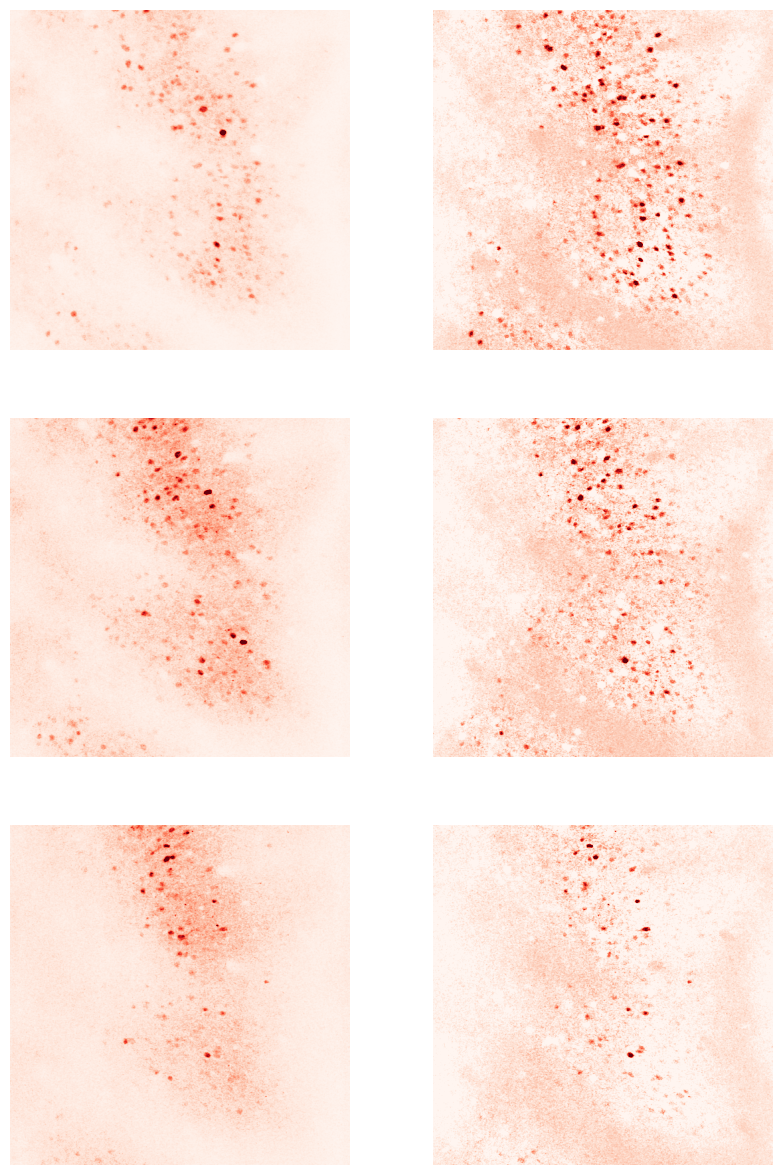

In [117]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))
Suite2pImg2 = np.zeros_like(RefImg1)



for planeID in range(min(3, nPlanes)):  # Ensure we don't exceed available planes
    axes[planeID, 0].imshow(RefImg1_correctNorm[planeID,:, :], cmap='Reds',vmin=0.0,vmax=0.5)
    axes[planeID, 0].axis('off')
    axes[planeID, 1].imshow(ming2[planeID,:,:], cmap='Reds',vmin=0.0,vmax=200)
    axes[planeID, 1].axis('off')
plt.show()

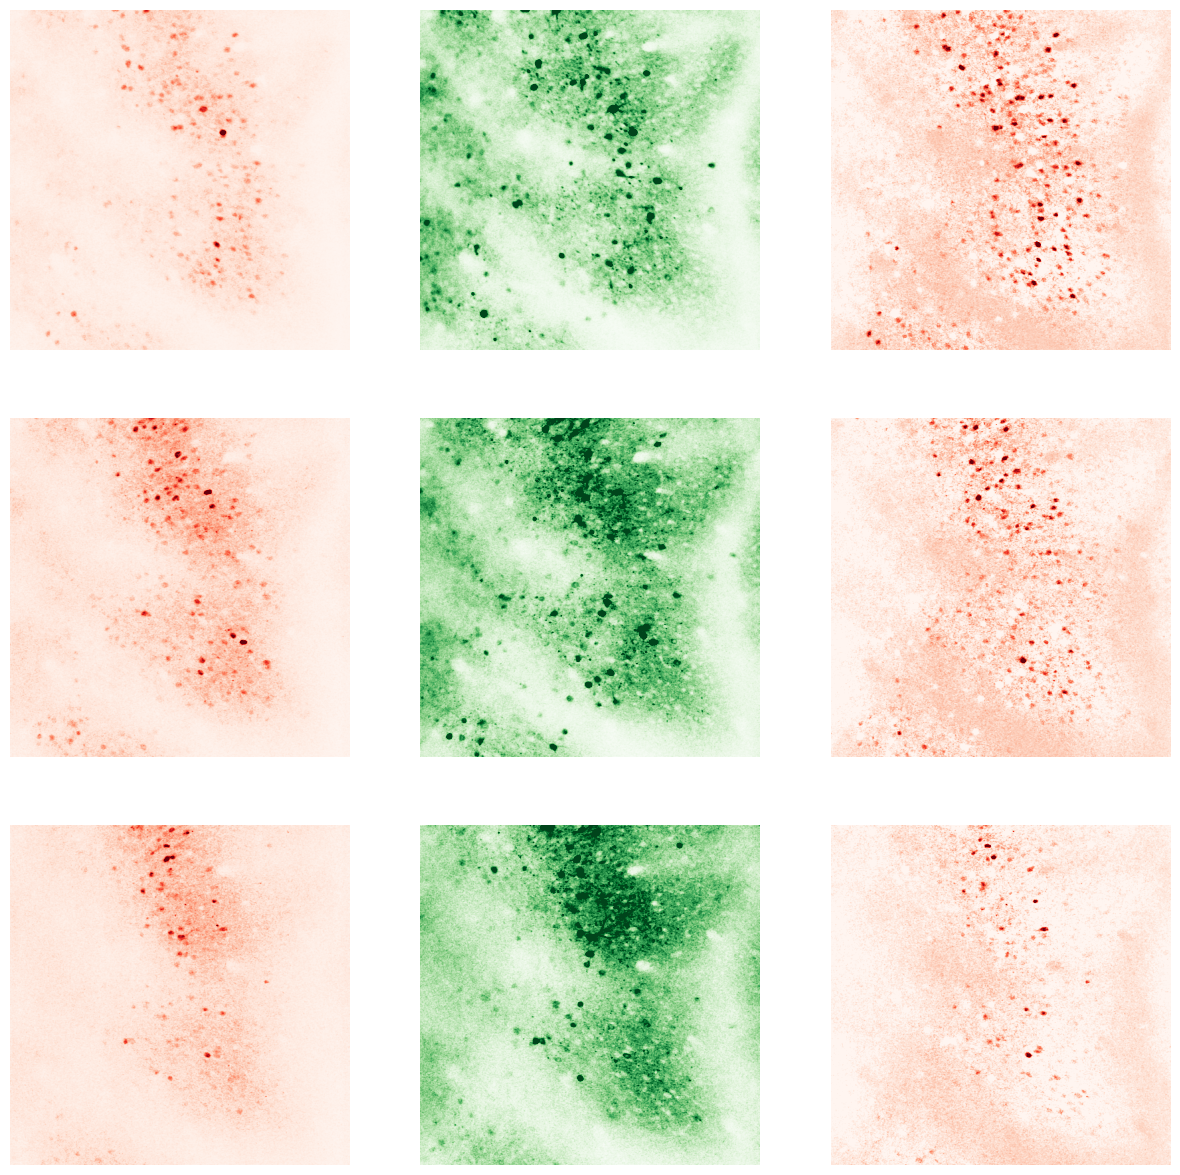

In [114]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
Suite2pImg2 = np.zeros_like(RefImg1)



for planeID in range(min(3, nPlanes)):  # Ensure we don't exceed available planes
    axes[planeID, 0].imshow(RefImg1_correctNorm[planeID,:, :], cmap='Reds',vmin=0.0,vmax=0.5)
    axes[planeID, 0].axis('off')
    axes[planeID, 1].imshow(RefImg2_correctNorm[planeID,:, :], cmap='Greens',vmin=0.0,vmax=0.1)
    axes[planeID, 1].axis('off')
    axes[planeID, 2].imshow(ming2[planeID,:,:], cmap='Reds',vmin=0.0,vmax=200)
    axes[planeID, 2].axis('off')
plt.show()

In [15]:
np.percentile(RefImg1, 99, axis=0)

array([[57.  , 56.94, 62.6 , ..., 56.88, 63.7 , 45.98],
       [66.9 , 70.48, 58.64, ..., 54.94, 62.5 , 48.98],
       [68.94, 63.86, 61.98, ..., 49.84, 65.72, 45.96],
       ...,
       [51.76, 44.96, 46.88, ..., 46.82, 40.98, 42.94],
       [52.98, 44.94, 66.68, ..., 61.52, 41.98, 44.9 ],
       [59.92, 50.82, 50.86, ..., 56.8 , 37.96, 44.9 ]])

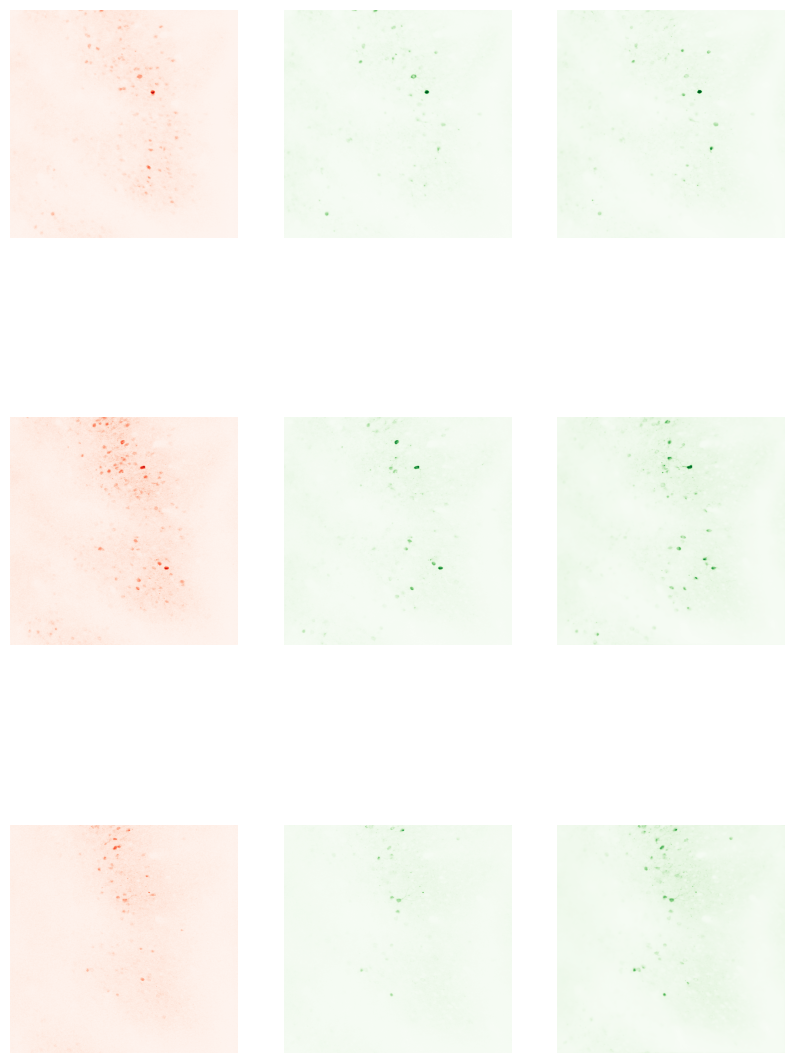

In [14]:
fig, axes = plt.subplots(3, 3, figsize=(10, 15))
Suite2pImg2 = np.zeros_like(RefImg1)

nPlanes = RefImg1.shape[2]
for planeID in range(min(3, nPlanes)):  # Ensure we don't exceed available planes
    axes[planeID, 0].imshow(RefImg1[planeID,:, :], cmap='Reds')
    axes[planeID, 0].axis('off')
    axes[planeID, 1].imshow(RefImg2[planeID,:, :], cmap='Greens')
    axes[planeID, 1].axis('off')

    temp=opsPlane[planeID].item()
    Suite2pImg2[planeID,:,:]=temp['meanImg']
    axes[planeID, 2].imshow(temp['meanImg'], cmap='Greens')
    axes[planeID, 2].axis('off')
plt.show()


[[0. 0.]
 [0. 0.]
 [0. 0.]]
[[1. 1.]
 [0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]
 [0. 0.]]


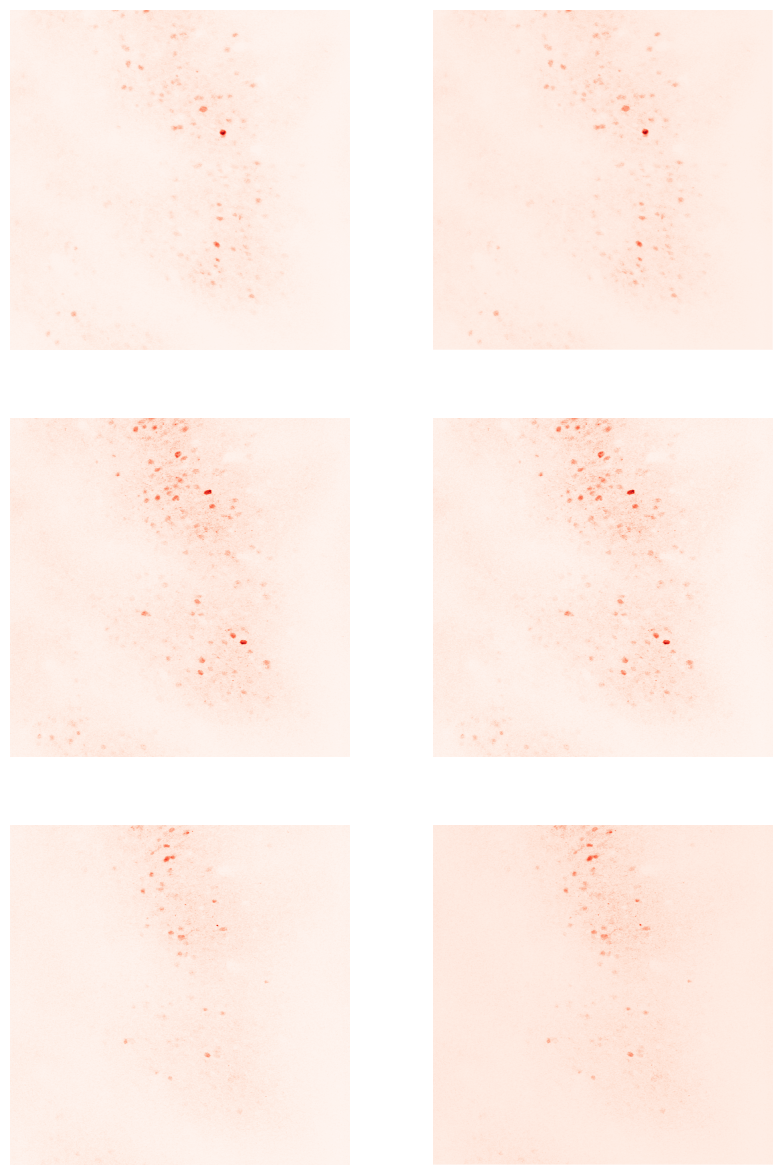

In [15]:
importlib.reload(FBS)
importlib.reload(CB)

nPlanes = RefImg1.shape[0]
CorrRefImg1 = np.zeros_like(RefImg1)
CorrRefImg2 = np.zeros_like(RefImg1)
yxShift=CB.Pixel_Shift(Suite2pImg2,RefImg2,nPlanes)


CorrRefImg1=CB.apply_affine_transform_to_ImgPlane(RefImg1,-yxShift)
CorrRefImg2=CB.apply_affine_transform_to_ImgPlane(RefImg2,-yxShift)
#CorrRefImg1 =CB.apply_affine_transform_to_all_frames(CorrRefImg1,-yxShift,planeID)

yxShift=CB.Pixel_Shift(RefImg1,RefImg1,nPlanes)
print(yxShift)
yxShift=CB.Pixel_Shift(Suite2pImg2,CorrRefImg1,nPlanes)
print(yxShift)
yxShift=CB.Pixel_Shift(Suite2pImg2,CorrRefImg2,nPlanes)
print(yxShift)
yxShift=CB.Pixel_Shift(CorrRefImg1,CorrRefImg2,nPlanes)
print(yxShift)
fig, axes = plt.subplots(3,2, figsize=(10, 15))
for planeID in range(min(3, nPlanes)):  # Ensure we don't exceed available planes
    axes[planeID, 0].imshow(RefImg1[planeID,:, :], cmap='Reds')
    axes[planeID, 0].axis('off')
    axes[planeID, 1].imshow(CorrRefImg1[planeID,:, :], cmap='Reds')
    axes[planeID, 1].axis('off')

plt.show()

In [8]:
opsTemp=opsPlane[0].item()
Ly, Lx = opsTemp["Ly"], opsTemp["Lx"]

In [21]:
print("RefImg1 min/max:", RefImg1.min(), RefImg1.max())
print("CorrRefImg1 min/max:", CorrRefImg1.min(), CorrRefImg1.max())
print("CorrRefImgRed min/max:", CorrRefImgRed.min(), CorrRefImgRed.max())

RefImg1 min/max: 30 1217
CorrRefImg1 min/max: -979.80115 658.45636
CorrRefImgRed min/max: 0 0


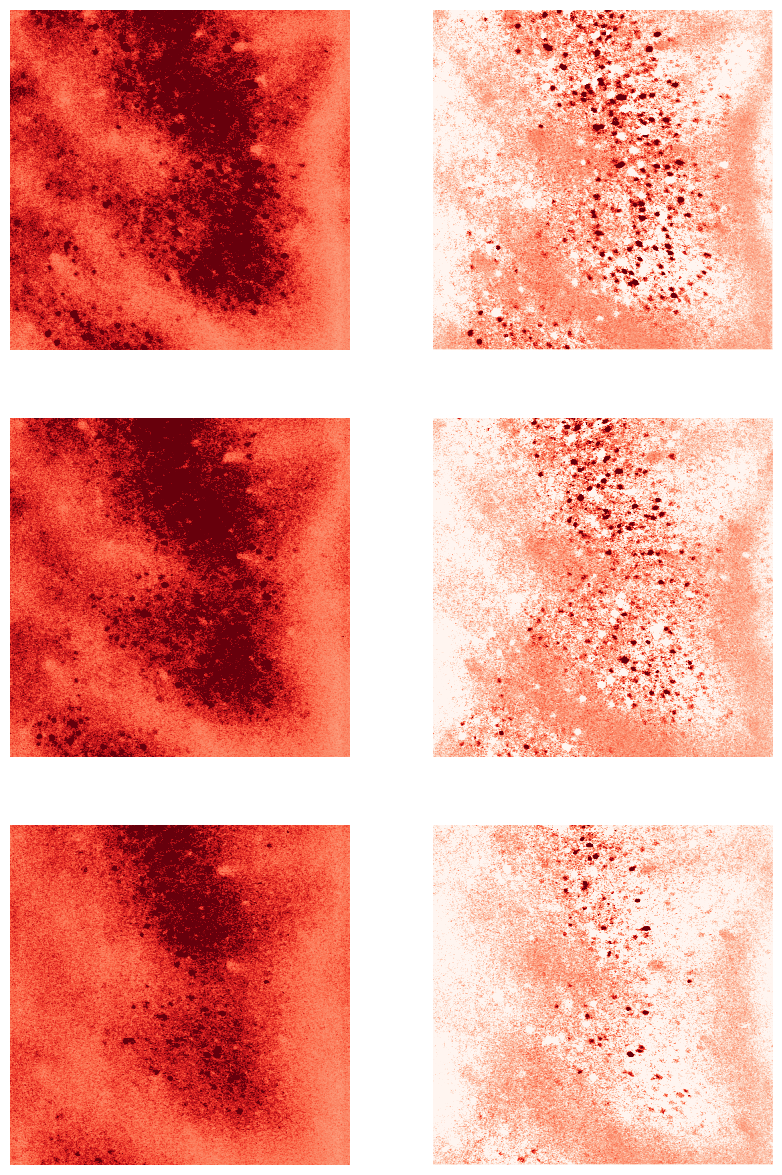

In [19]:
nblks=3
import suite2p.detection.chan2detect

CorrRefImg1 = CorrRefImg1.astype(np.float32)
CorrRefImg2 = CorrRefImg2.astype(np.float32)
CorrRefImgRed = np.zeros_like(RefImg1)
fig, axes = plt.subplots(3,2, figsize=(10, 15))
for planeID in range(min(3, nPlanes)):  # Ensure we don't exceed available planes
    axes[planeID, 0].imshow(RefImg1[planeID,:, :], cmap='Reds',vmin=0, vmax=100)
    axes[planeID, 0].axis('off')
    axes[planeID, 1].imshow(CorrRefImg1[planeID,:, :], cmap='Reds',vmin=0, vmax=100)
    axes[planeID, 1].axis('off')

plt.show()

In [17]:
for planeID in range(min(3, nPlanes)):  
    CorrRefImgRed[planeID,:,:]=suite2p.detection.chan2detect.correct_bleedthrough(Ly, Lx, nblks, CorrRefImg2[planeID,:,:], CorrRefImg1[planeID,:,:])



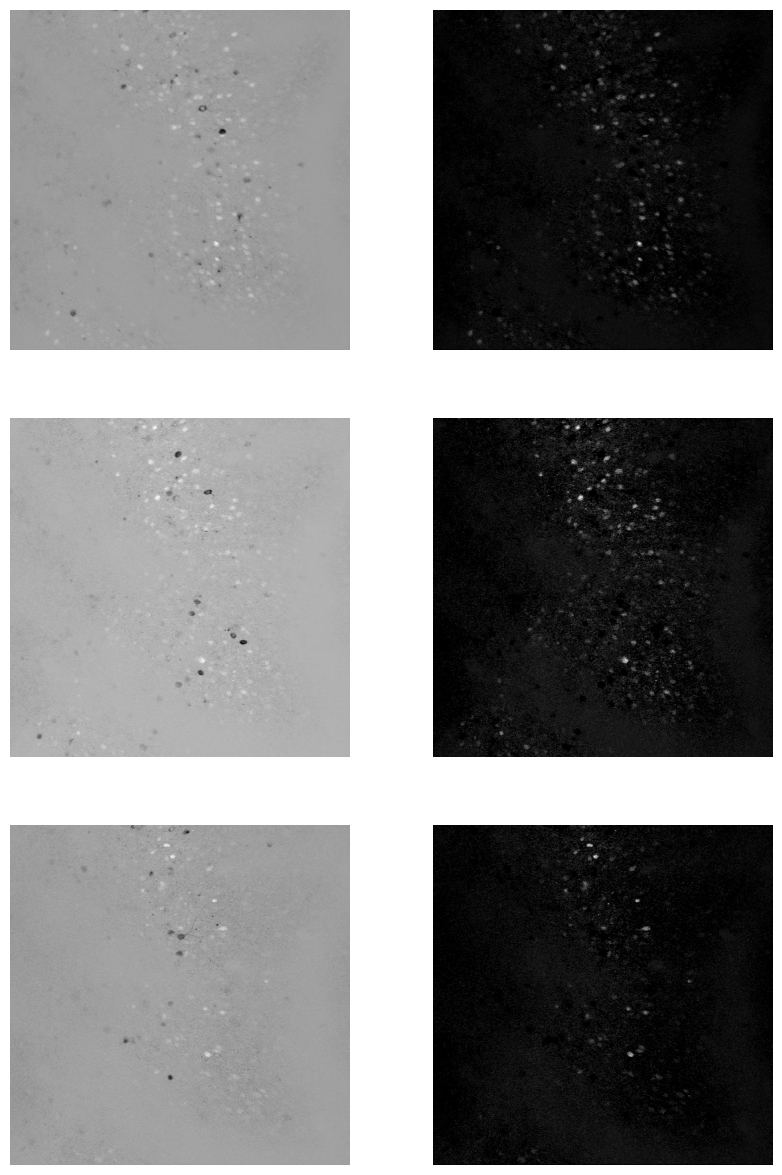

In [18]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))
nPlanes = RefImg1.shape[2]
for planeID in range(min(3, nPlanes)):  # Ensure we don't exceed available planes
    axes[planeID, 0].imshow(CorrRefImg1[planeID,:, :], cmap='gray')
    axes[planeID, 0].axis('off')
    axes[planeID, 1].imshow(CorrRefImgRed[planeID,:, :], cmap='gray')
    axes[planeID, 1].axis('off')
plt.show()

In [1]:
import os
import numpy as np
from suite2p.io.tiff import imread

def load_ref_ch(data_folder, ChID=1):
    """
    Load a specific reference channel (1 or 2) from multi-channel TIFF files using Suite2p.
    
    Parameters:
    - data_folder (str): The folder containing TIFF files.
    - ChID (int): The channel ID to load (1 or 2). Ch2 data is identified by filenames containing 'Ch2'.
    
    Returns:
    - channel_data (numpy.ndarray): Concatenated data from the specified channel across all TIFF files.
      The output shape is (nPlane, Ly, Lx).
    """
    if ChID not in [1, 2]:
        raise ValueError("ChID must be 1 or 2.")

    # List all TIFF files that match the specified channel
    tiff_files = [os.path.join(data_folder, f) for f in os.listdir(data_folder) 
                  if f.lower().endswith('.tif') and f'Ch{ChID}' in f]

    if not tiff_files:
        print(f"No TIFF files found for Channel {ChID} in the specified folder.")
        return None

    # Load the specified channel from all TIFF files
    channel_data = []
    for tiff_file in tiff_files:
        img_data = imread(tiff_file)  # Load the TIFF data
        if img_data is None:
            print(f"Failed to load image: {tiff_file}")
            continue

        # Handle multi-page or multi-channel TIFF files
        if img_data.ndim == 4:  # Expected shape: (num_frames, num_channels, height, width)
            plane_data = img_data[ChID-1, 0, :, :]  # Select the specified channel and the first plane only
            channel_data.append(plane_data)
        elif img_data.ndim == 3 and img_data.shape[0] in [2, 3]:
            img_data = img_data[ChID-1, :, :]  # Select the correct channel if multi-channel
            channel_data.append(img_data)
        elif img_data.ndim == 2:  # Already a 2D image
            channel_data.append(img_data)
        else:
            print(f"Unexpected image dimensions for {tiff_file}: {img_data.shape}")
            continue

    # Concatenate data along the plane dimension to get (nPlane, Ly, Lx)
    if channel_data:
        channel_data = np.stack(channel_data, axis=0)
        print(f"Loaded data shape: {channel_data.shape}, Expected nPlane: {len(tiff_files)}")
        return channel_data
    else:
        print("No valid channel data loaded.")
        return None
